# Predicting Remaining Useful Life

Nisarg Nigam

## Introduction

Predictive Maintenance is a very practical usecase of machine learning algorithms in the industry. One major component of predictive maintenance is predicting the remaining useful life for assets by feeding data from sensors and other settings. This allows organizations to monitor the health of their assets and conduct necessary maintenance before the machine breaks down and causes delays in the production line.

I have attempted to explore this practicality in this project.

The context of this project and the dataset is of an airplane engine.

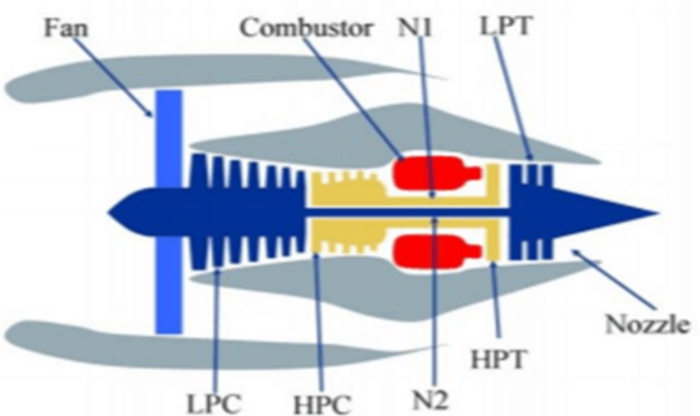

In [1]:
#Import standard libraries

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize'] = (10, 8)

## Exploratory Dataset Analysis

The dataset being used is the [Turbofan Engine Degradation Simulation Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan) sourced from the Prognostics Center of Excellence, NASA. 

There are 5 variations available and have the following features. The simplest is the FD001 with a single fault mode and a single operating condition. The FD004 appears to be the hardest since it has multiple operating conditions and fault modes. The PHM08 Dataset is an ongoing challenge that started 2008. The test y is not given and contestants need to submit their values on the website to find their score. A lot of publications were made for this dataset. 

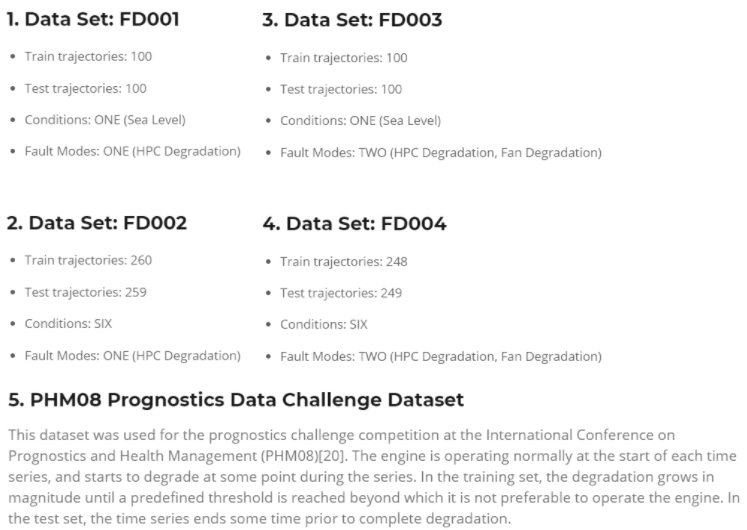

FD001 was experimented with for EDA purposes but the machine learning models were run on FD004 which is a more realistic dataset.

In [2]:
# Reading the files

df = pd.read_csv('train_FD004.txt', header=None, sep=' ').dropna(how='all',
                                                                 axis=1)
df1 = pd.read_csv('train_FD001.txt', header=None, sep=' ').dropna(how='all',
                                                                  axis=1)

index_names = ['id', 'cycle']
setting_names = ['setting1', 'setting2', 'setting3']
sensor_names = ['s{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

df.columns = col_names
df1.columns = col_names

df

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        1      1   42.0049    0.8400     100.0  445.00  549.68  1343.43   
1        1      2   20.0020    0.7002     100.0  491.19  606.07  1477.61   
2        1      3   42.0038    0.8409     100.0  445.00  548.95  1343.12   
3        1      4   42.0000    0.8400     100.0  445.00  548.70  1341.24   
4        1      5   25.0063    0.6207      60.0  462.54  536.10  1255.23   
...    ...    ...       ...       ...       ...     ...     ...      ...   
61244  249    251    9.9998    0.2500     100.0  489.05  605.33  1516.36   
61245  249    252    0.0028    0.0015     100.0  518.67  643.42  1598.92   
61246  249    253    0.0029    0.0000     100.0  518.67  643.68  1607.72   
61247  249    254   35.0046    0.8400     100.0  449.44  555.77  1381.29   
61248  249    255   42.0030    0.8400     100.0  445.00  549.85  1369.75   

            s4     s5  ...     s12      s13      s14      s15   s16  s17  \
0      1112.93   3.91  ...  129.78  2387.99  8074.83   9.3335  0.02  330   
1      1237.50   9.35  ...  312.59  2387.73  8046.13   9.1913  0.02  361   
2      1117.05   3.91  ...  129.62  2387.97  8066.62   9.4007  0.02  329   
3      1118.03   3.91  ...  129.80  2388.02  8076.05   9.3369  0.02  328   
4      1033.59   7.05  ...  164.11  2028.08  7865.80  10.8366  0.02  305   
...        ...    ...  ...     ...      ...      ...      ...   ...  ...   
61244  1315.28  10.52  ...  380.16  2388.73  8185.69   8.4541  0.03  372   
61245  1426.77  14.62  ...  535.02  2388.46  8185.47   8.2221  0.03  396   
61246  1430.56  14.62  ...  535.41  2388.48  8193.94   8.2525  0.03  395   
61247  1148.18   5.48  ...  187.92  2388.83  8125.64   9.0515  0.02  337   
61248  1147.45   3.91  ...  134.32  2388.66  8144.33   9.1207  0.02  333   

        s18     s19    s20      s21  
0      2212  100.00  10.62   6.3670  
1      2324  100.00  24.37  14.6552  
2      2212  100.00  10.48   6.4213  
3      2212  100.00  10.54   6.4176  
4      1915   84.93  14.03   8.6754  
...     ...     ...    ...      ...  
61244  2319  100.00  29.11  17.5234  
61245  2388  100.00  39.38  23.7151  
61246  2388  100.00  39.78  23.8270  
61247  2223  100.00  15.26   9.0774  
61248  2212  100.00  10.66   6.4341  

[61249 rows x 26 columns]

From the dataframe above, the various settings and sensors are visible. The sensors are as follows:

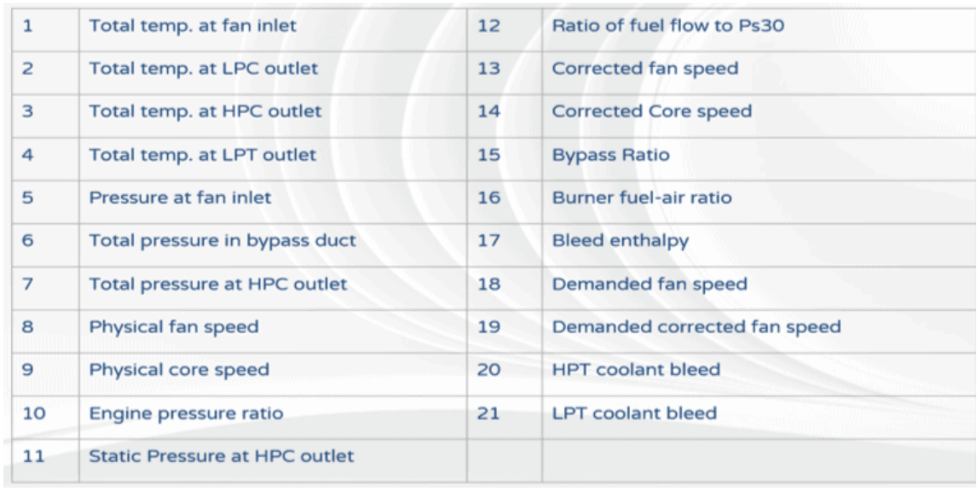

The way the dataframe is formatted is that the cycles go on until the machine breaks down. In the test set for this, a similar format is given but the cycles go on until a particular duration only, which is before the actual break down.

The remaining useful life can therefore be calculated by finding the max cycles for each engine id. A distribution plot can be seen below where most of the RUL are near 200 cycles.

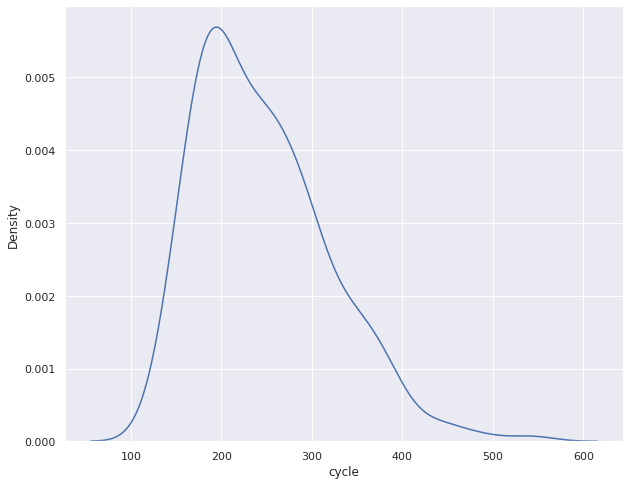

In [3]:
rul = df.groupby('id')['cycle'].max()
rul1 = df1.groupby('id')['cycle'].max()
# sns.boxplot(rul);
sns.kdeplot(rul);

The correlation plot below shows a comparison of the 2 datasets. In an ideal situation, you would have sensors that have a clear correlation with the cycles as well as being exclusive with the other sensors. However, in the real world, data is much more noisy. No clear correlations of sensor data with the cycles can be seen and it even appears that the sensors are all quite strongly correlated. 

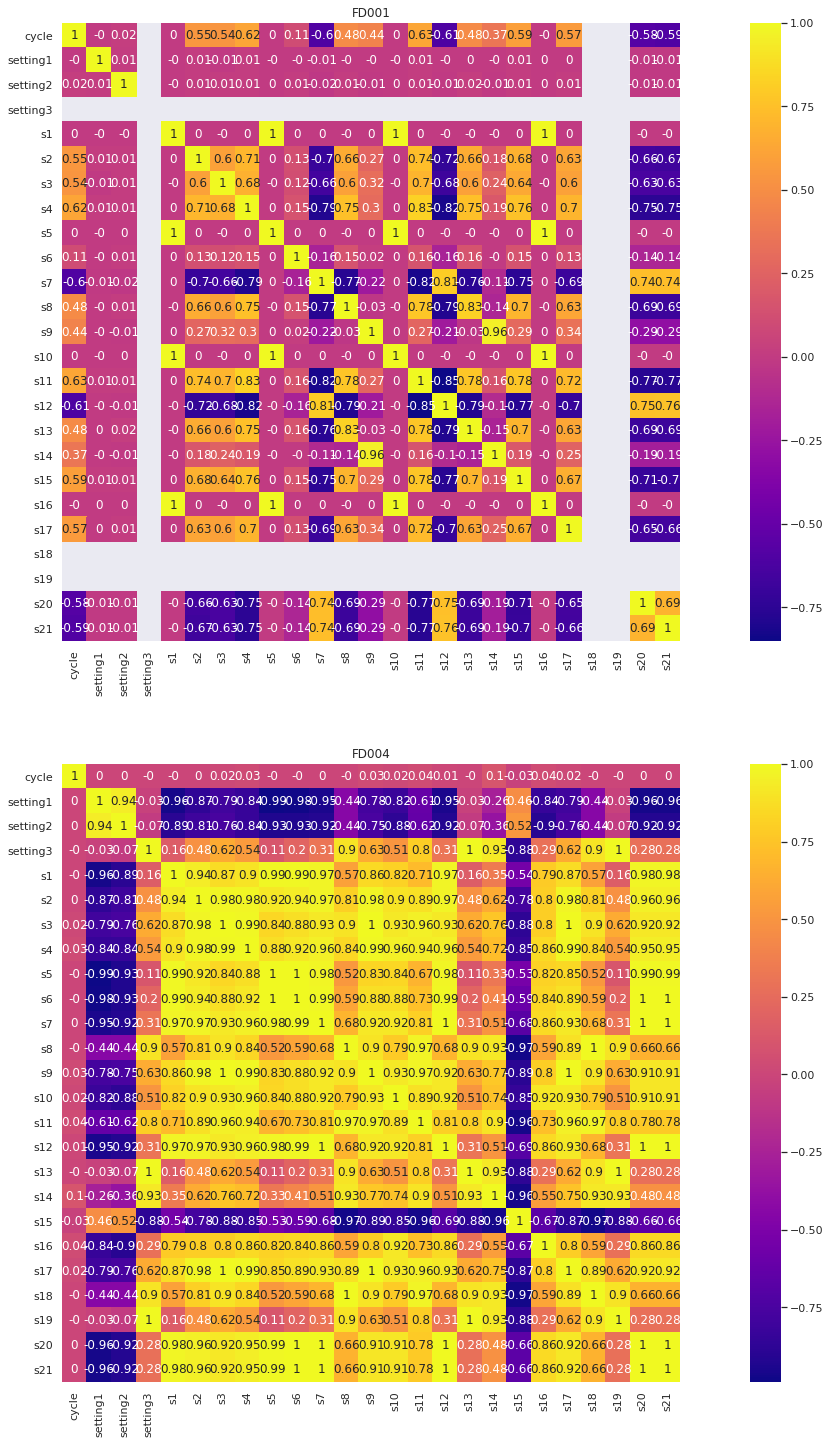

In [4]:
fig, ax = plt.subplots(2,1, figsize=(25,25))

sns.heatmap((df1.drop(columns='id').corr().round(decimals=2)), annot=True,
            square=True, cmap='plasma', ax=ax[0])
ax[0].set_title('FD001')
sns.heatmap((df.drop(columns='id').corr().round(decimals=2)), annot=True,
            square=True, cmap='plasma', ax=ax[1])
ax[1].set_title('FD004');

In [5]:
# Add a RUL column

df['rul'] = rul.loc[df.id].reset_index(drop=True) - df.cycle
df1['rul'] = rul1.loc[df1.id].reset_index(drop=True) - df1.cycle

To look deeper at how these sensors behave in the general dataset and a specific engine, they are plotted along the RUL. In the FD001, a clear trend is visible is some sensors, but when it comes to FD004, it is very noisy. This may be solved with some feature engineering, but was not done for this project. Furthermore, the trends per machine can be opposite in some sensors too.

In [6]:
def plot_ts(df, engine_num='All'): 
    # prepare the dataframe for plotting
    cols = df.columns[2:-1]
    fig, axes = plt.subplots(len(cols), 1, figsize=(19,35))
    
    if engine_num != 'All':
        for col, ax in zip(cols, axes):
            g = df[df.id==1][['cycle', col]]
            z = np.polyfit(g.cycle, g[col], 1)
            y_hat = np.poly1d(z)(g.cycle)
            sns.lineplot(x='cycle', y=col, data=g, ax=ax)
            sns.lineplot(x=g.cycle, y=y_hat, ax=ax)
            ax.set_xticks(np.arange(0,g.cycle.max(), g.cycle.max()//10))
            ax.set_xticklabels(abs(np.arange(-g.cycle.max(), 0,
                                             g.cycle.max()//10)))
            ax.set_xlabel('rul')
    else:
        g = (df.groupby(['rul', 'id']).mean().reset_index()
             .sort_values('rul', ascending=False).reset_index(drop=True))
        for col, ax in zip(cols, axes):
            for id_ in g.id.unique():
                sns.lineplot(x=-g['rul'], y=col, data=g[g.id==id_], ax=ax)
        
    # figure title    
    fig.suptitle('Engine #: {}'.format(engine_num), y=.9);

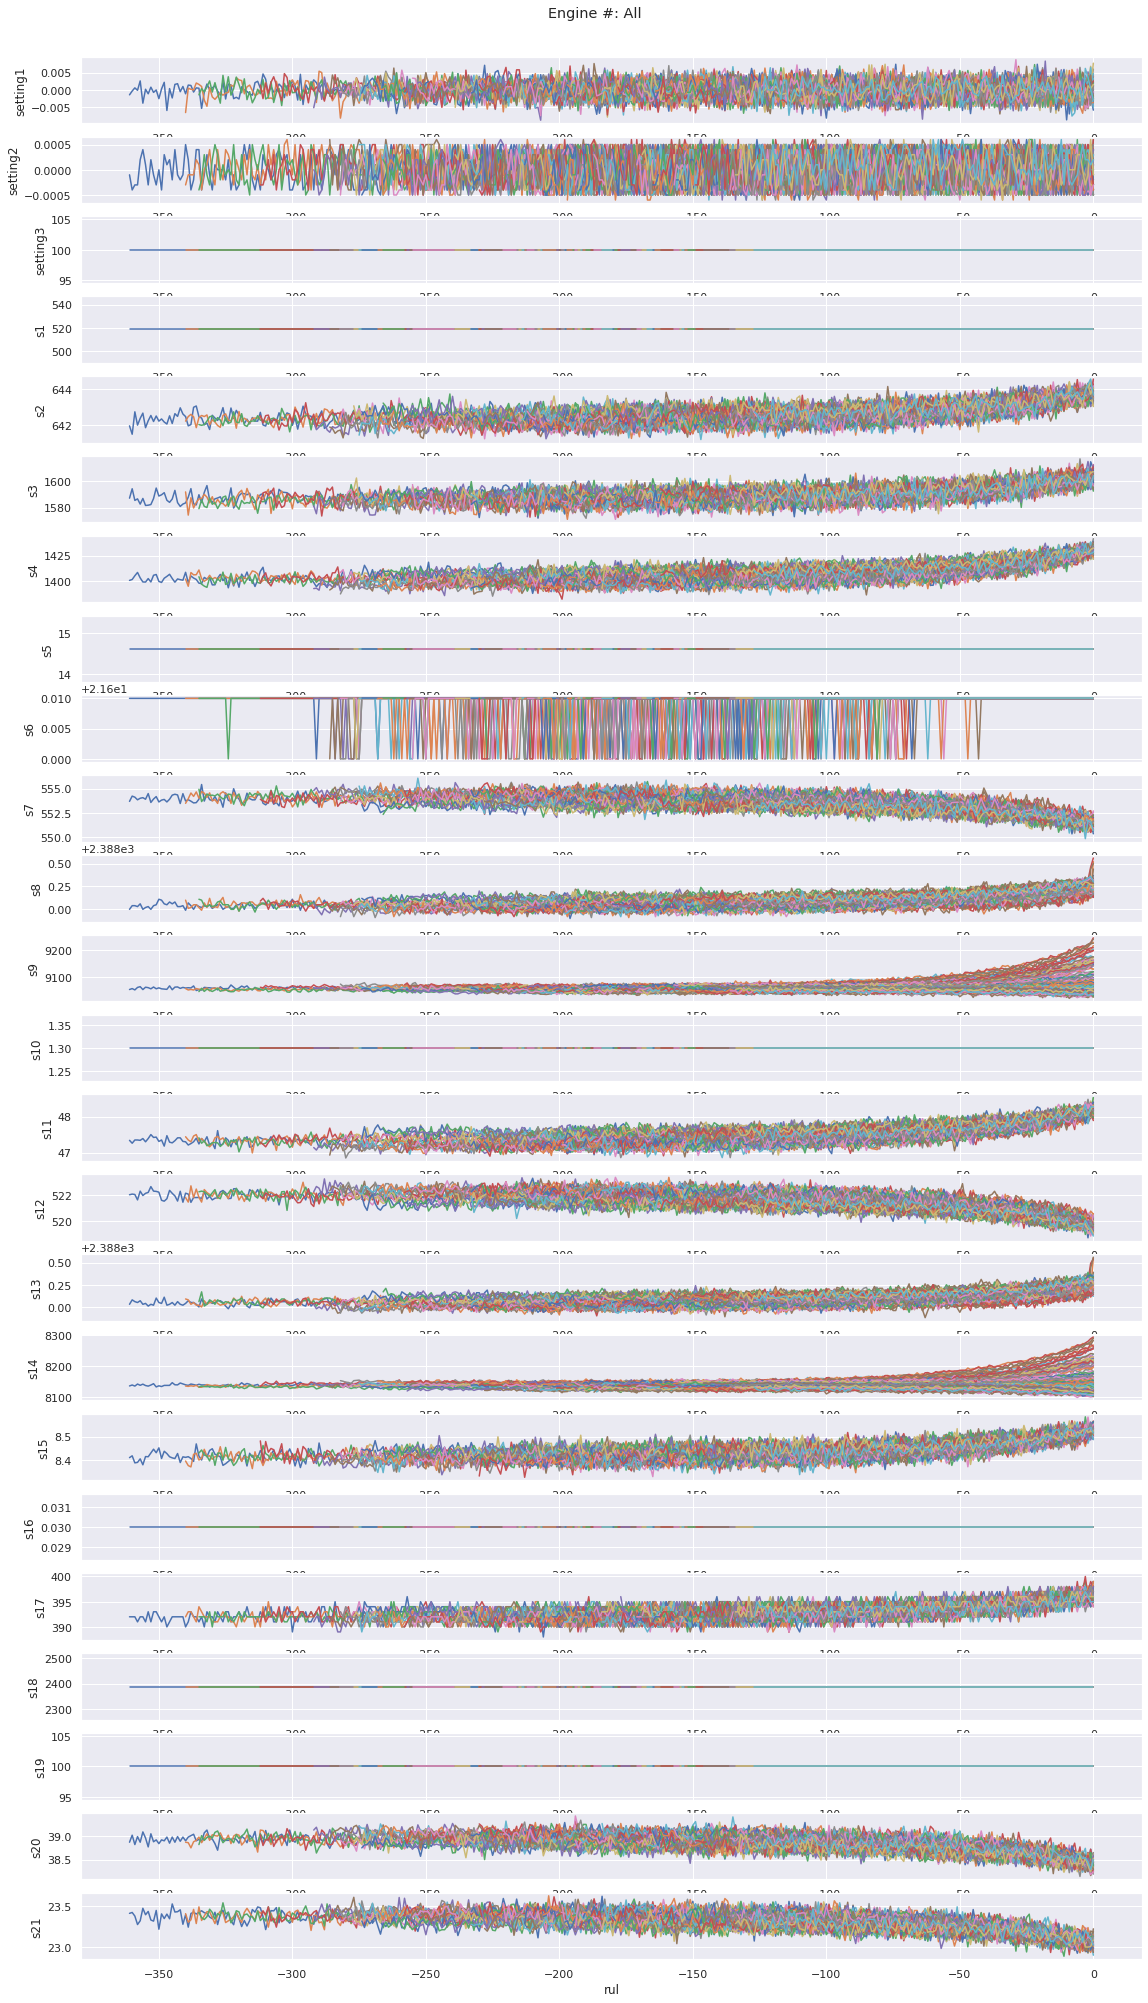

In [8]:
plot_ts(df1)

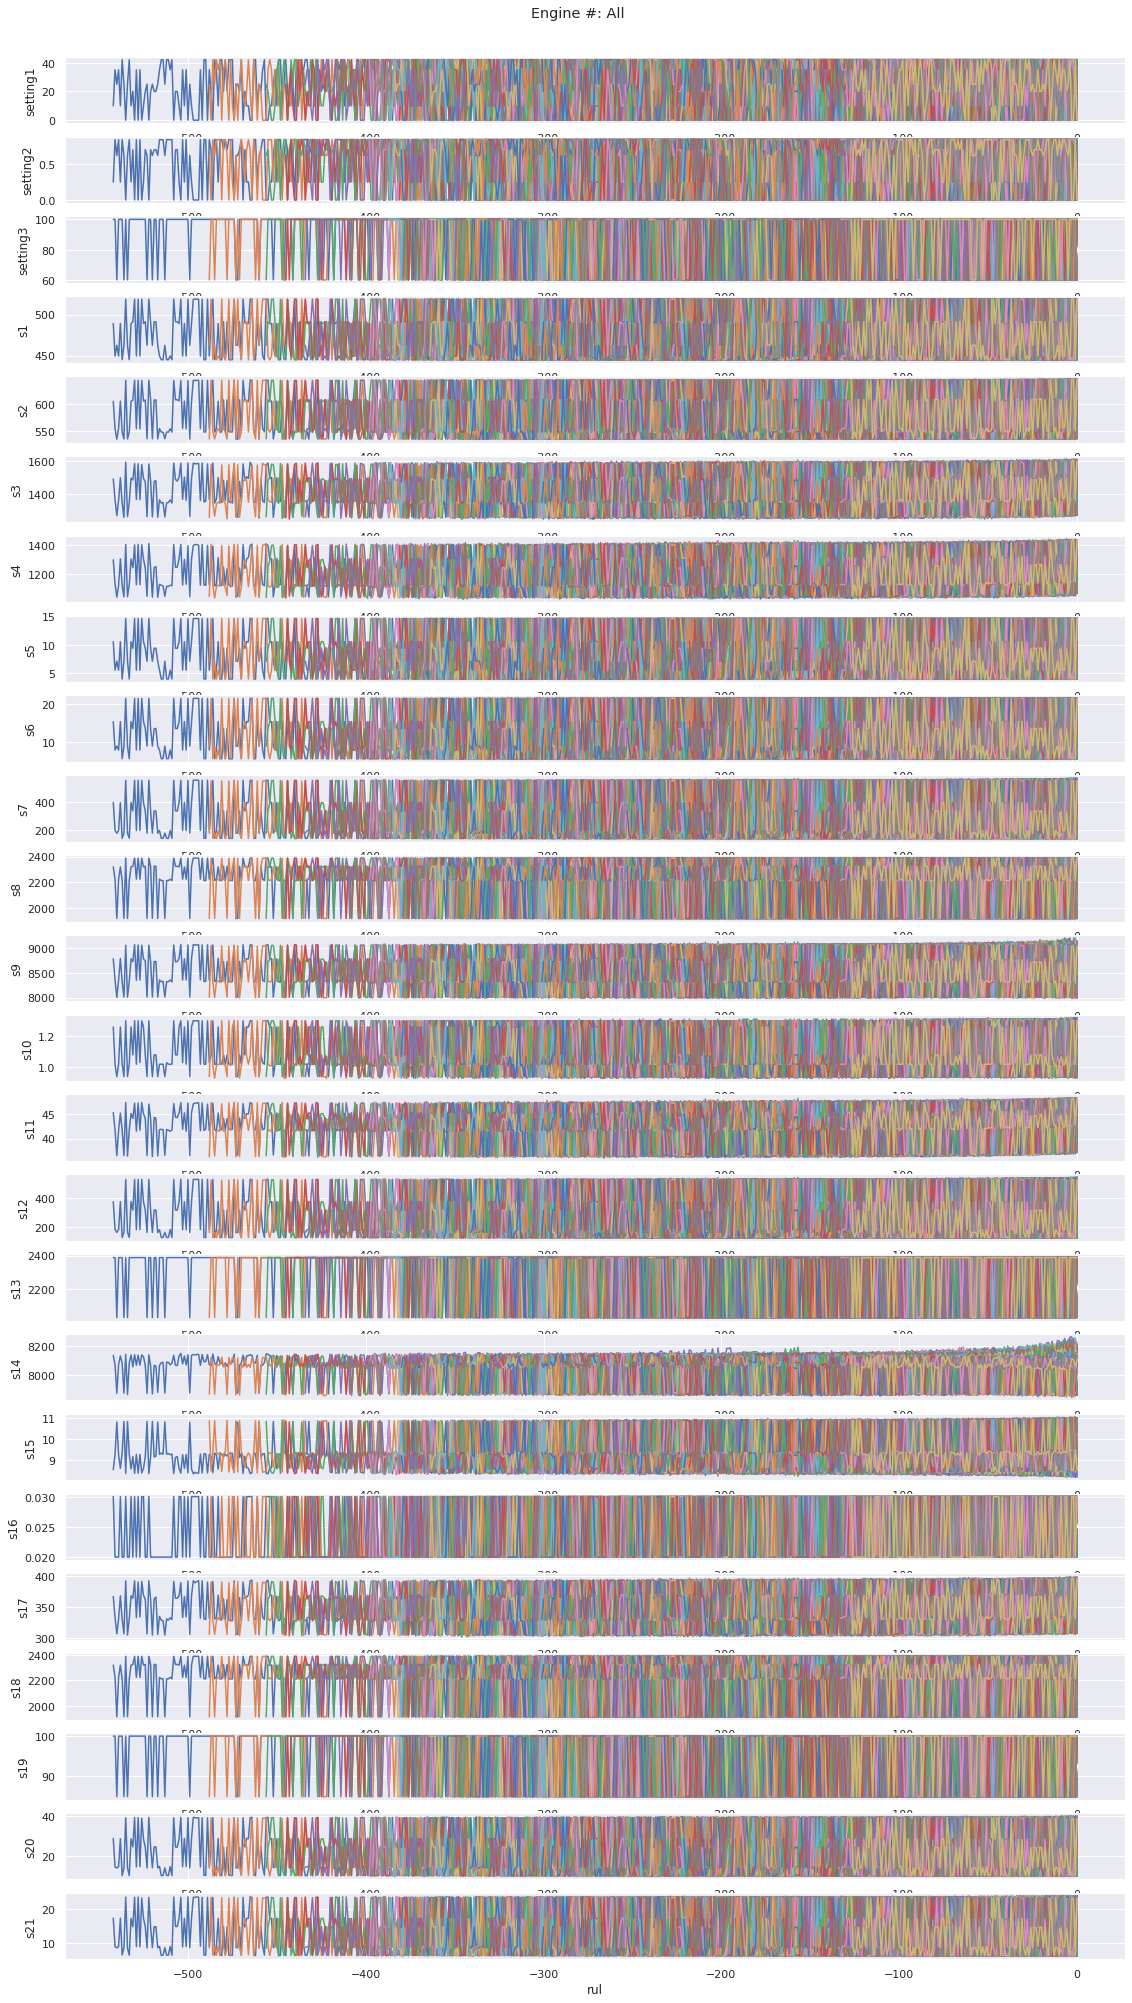

In [7]:
plot_ts(df)

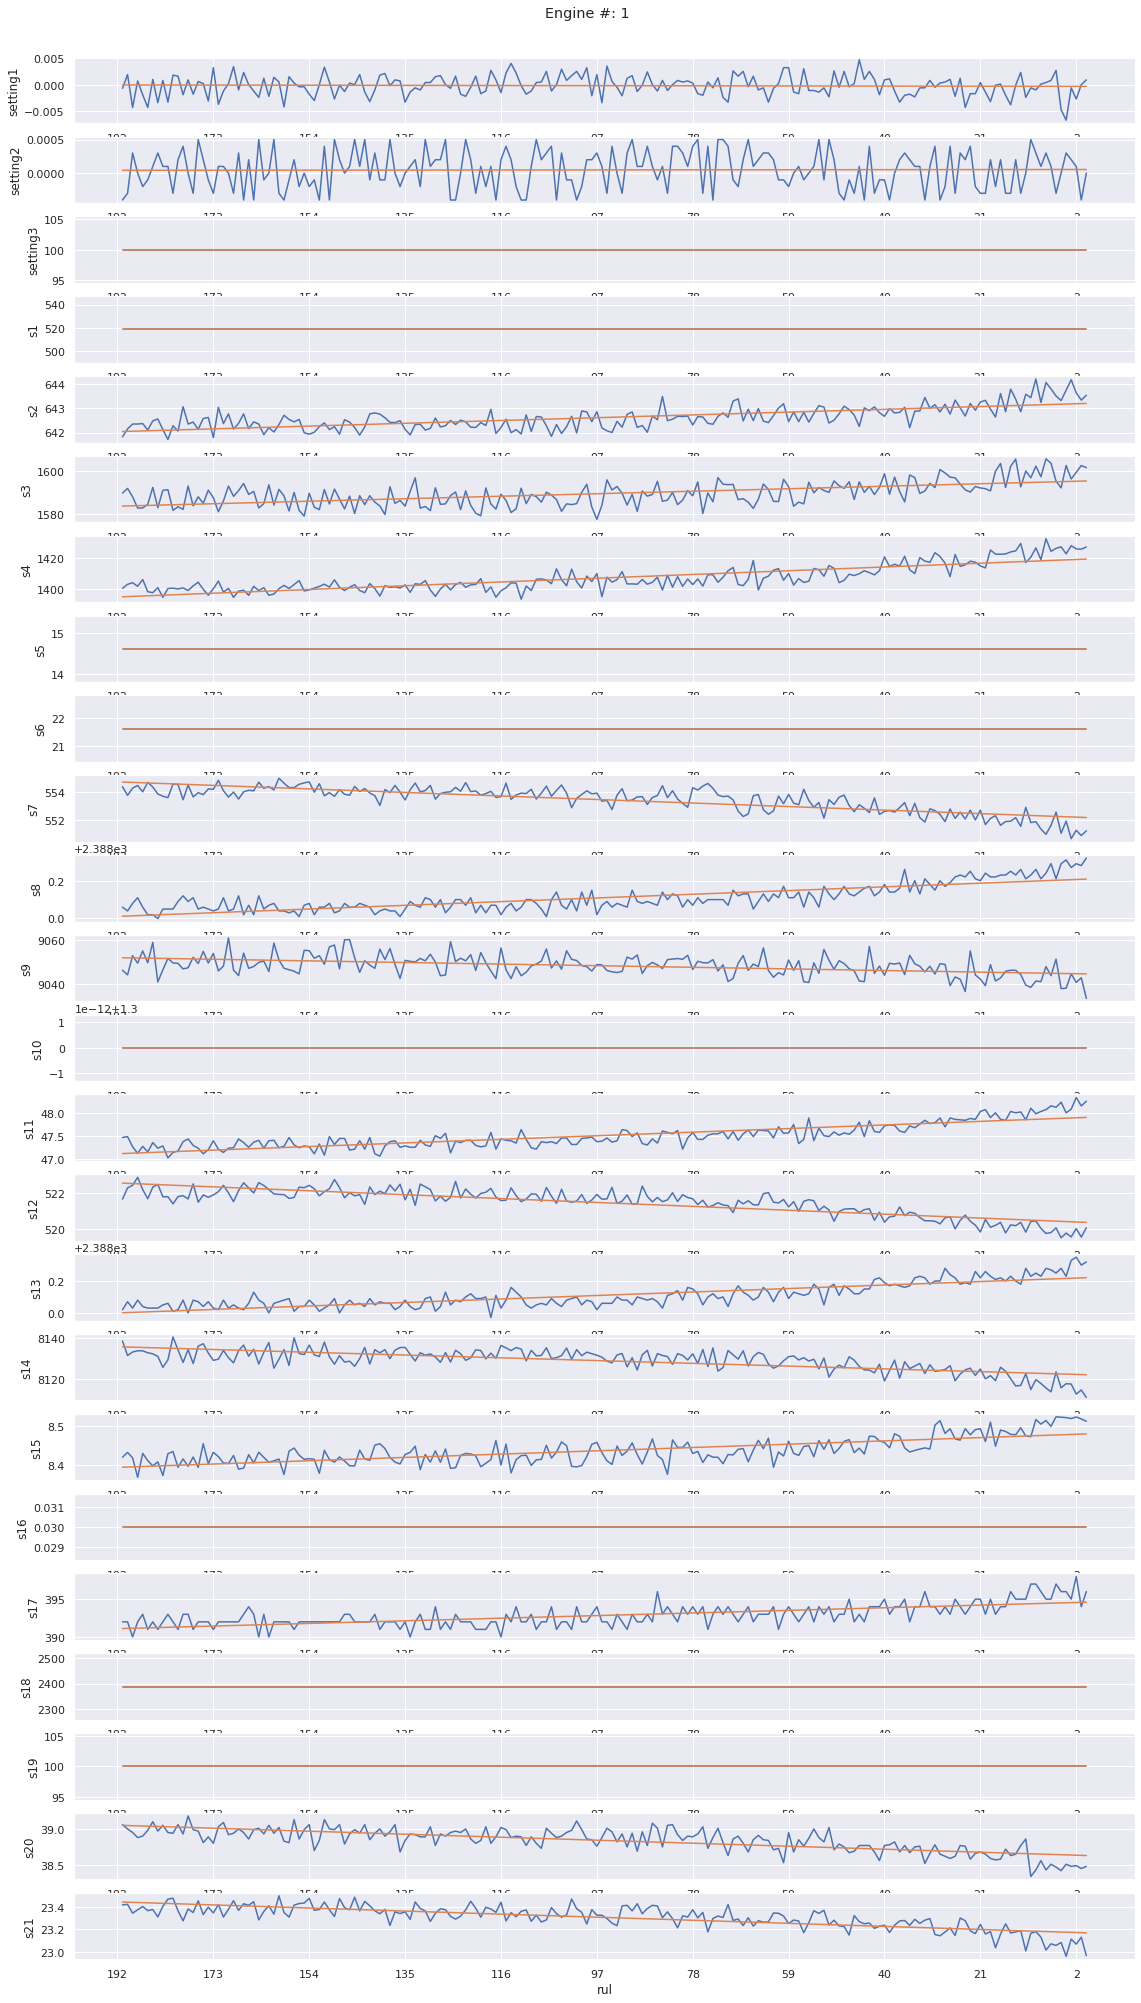

In [10]:
plot_ts(df1, 1)

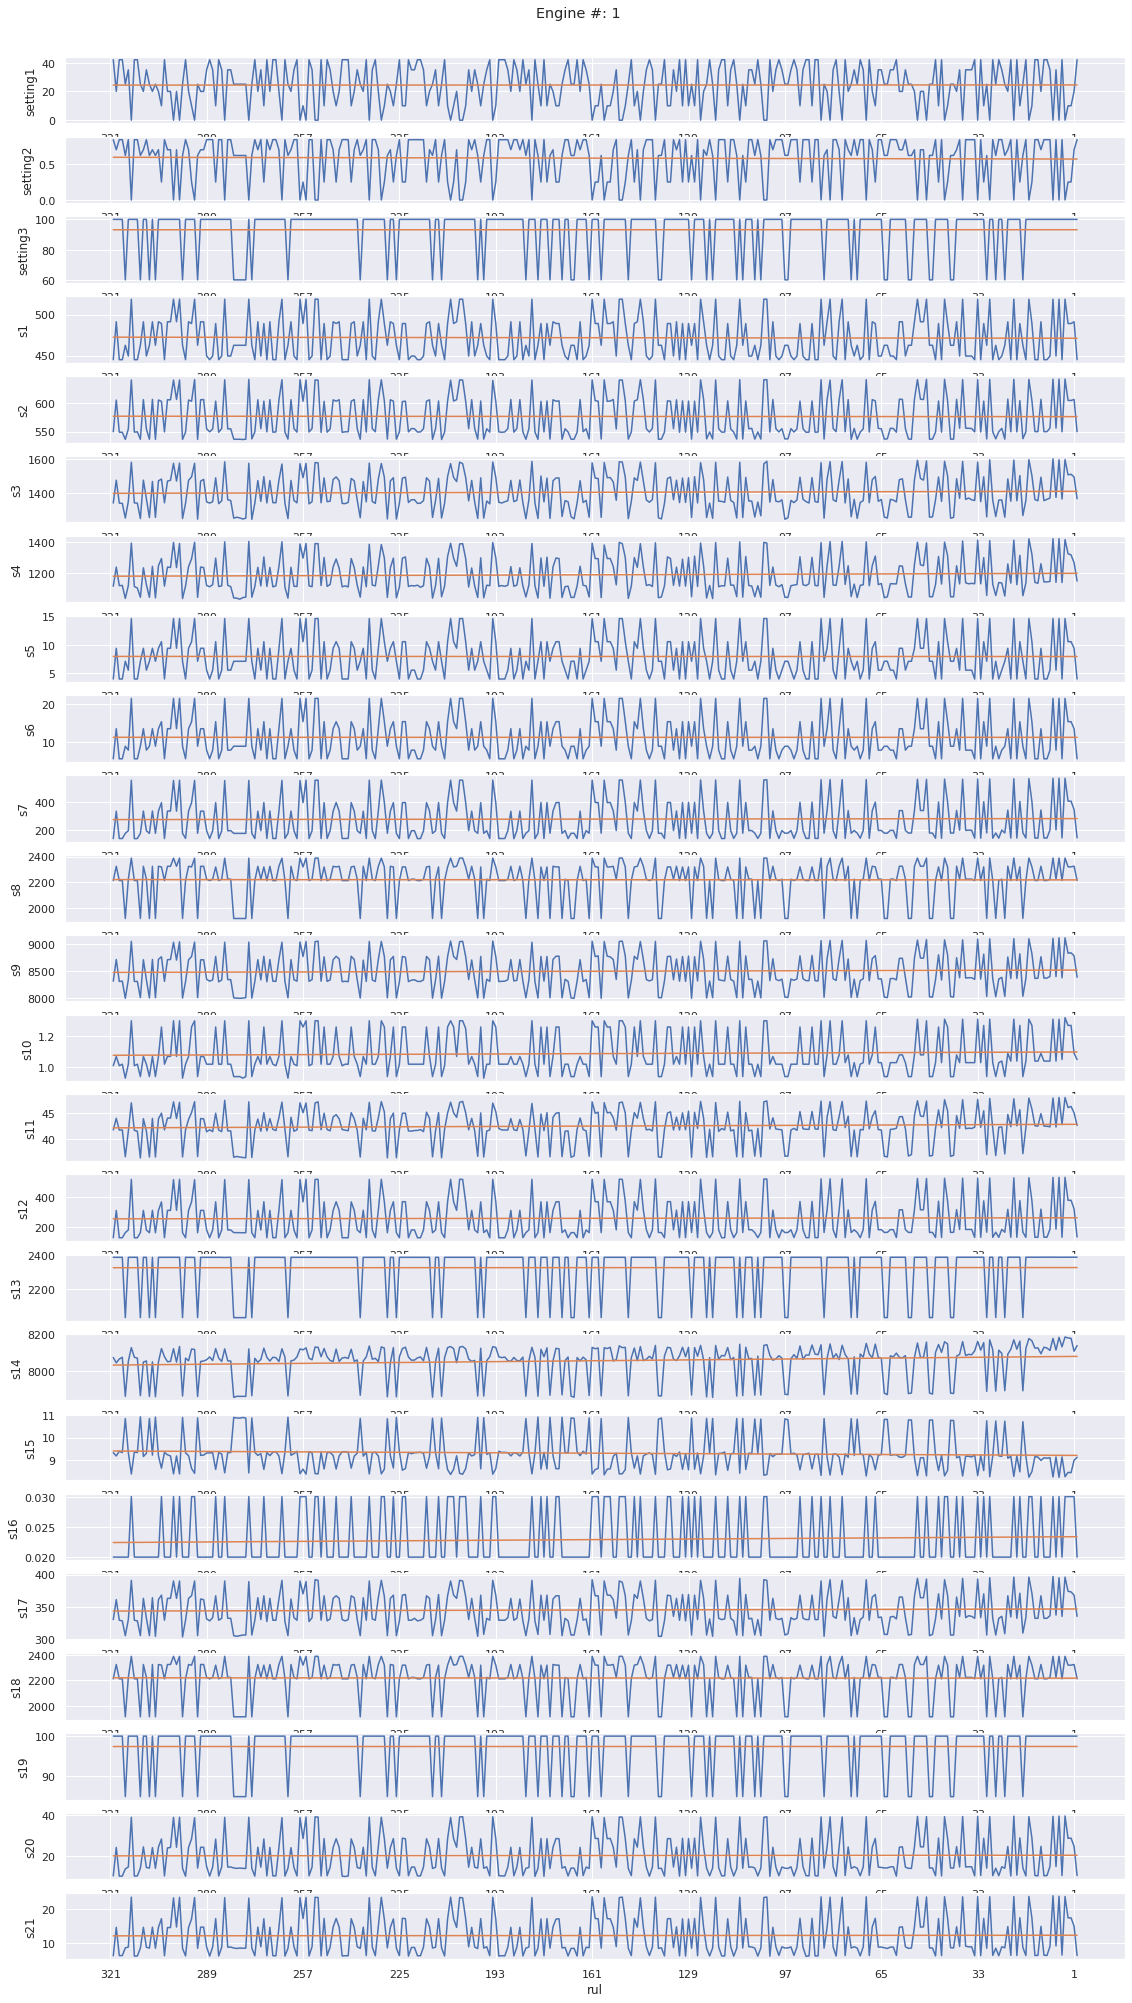

In [9]:
plot_ts(df, 1)

To extract some particular sensors, it was considered to take only those with a correlation with cycles greater than 0.5. This would work on the FD001 but not in FD004.

In [11]:
order = (abs(df.drop(columns='id').corrwith(df.rul))
         .sort_values(ascending=False)[2:])

order3 = (abs(df1.drop(columns='id').corrwith(df1.rul))
         .sort_values(ascending=False)[2:])
order4 = list(order[np.where(order3>0.5)[0]].index)

order2 = list(order.index)
order

s14         0.078126
s11         0.056639
s16         0.053804
s4          0.045881
s17         0.032939
s3          0.032924
s9          0.024727
s10         0.008924
s2          0.004443
s15         0.003957
s20         0.002812
s21         0.002791
s18         0.002765
setting1    0.002380
s19         0.002303
setting3    0.002303
setting2    0.002280
s8          0.002086
s1          0.001889
s5          0.001679
s12         0.001639
s13         0.001501
s7          0.001429
s6          0.001349
dtype: float64

Another method that was experimented with was clipping. This meant that all datapoints before a certain point would be considered good and therefore would make it simpler for the models to distinguish between good behaviour and potentially bad behaviour. This behaviour plotted along the PF curve showed a clear pattern for a single sensor in a single engine for the FD001. However, the same sensor and engine in the FD001 had no clear trend.

Secondly, this method of making a PF curve becomes faulty in FD004. In fact, if the trend of the sensor is going upwards, the PF curve is already not fitted.

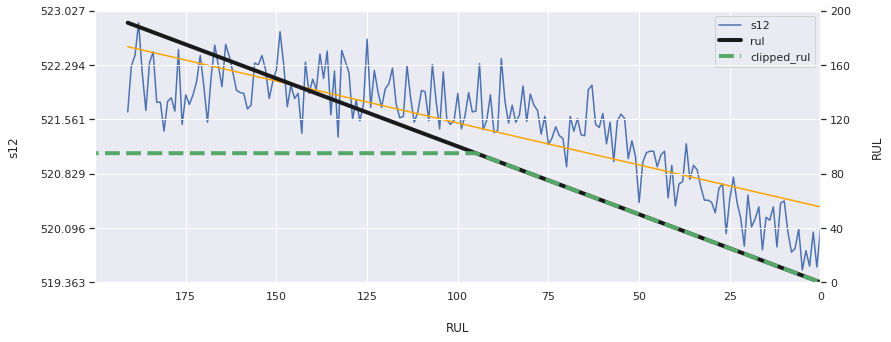

In [19]:
g = df1[df1.id==1][['cycle', 's12']]
z = np.polyfit(g.cycle, g['s12'], 1)
y_hat = np.poly1d(z)(g.cycle)

clipped_rul = df1.loc[df1['id']==1].copy()
clipped_rul['rul'].clip(upper=95, inplace=True)

fig, ax1 = plt.subplots(1,1, figsize=(13,5))

signal = ax1.plot('rul', 's12', 'b',
                 data=df1.loc[df1['id']==1])
plt.xlim(200, 0)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 200, 25))
ax1.set_ylabel('s12', labelpad=20)
ax1.set_xlabel('RUL', labelpad=20)
sns.lineplot(x=df1.loc[df1['id']==1]['rul'], y=y_hat, ax=ax1, color='orange')

ax2 = ax1.twinx()
rul_line = ax2.plot('rul', 'rul', 'k', linewidth=4,
                   data=df1.loc[df1['id']==1])
rul1_ = df1.loc[df1['id']==5, 'rul']
rul_line2 = ax2.plot(rul1_, rul1_.where(rul1_ <= 95, 95), '--g', linewidth=4,
                     label='clipped_rul')  # SET LABEL MANUALLY?
ax2.set_ylabel('RUL', labelpad=20)

# code to have equal spacing of y ticks for both axes, so the gridlines allign
ax2.set_ylim(0, 200)  # set limits of axis you want to display neatly
ax2.set_yticks(
    np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))
# choose integer to neatly divide your axis, in our case 6
ax1.set_yticks(
    np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6)) 
# apply same spacing to other axis


# code to have a unified legend
lines = signal+rul_line+rul_line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=0)

plt.show()

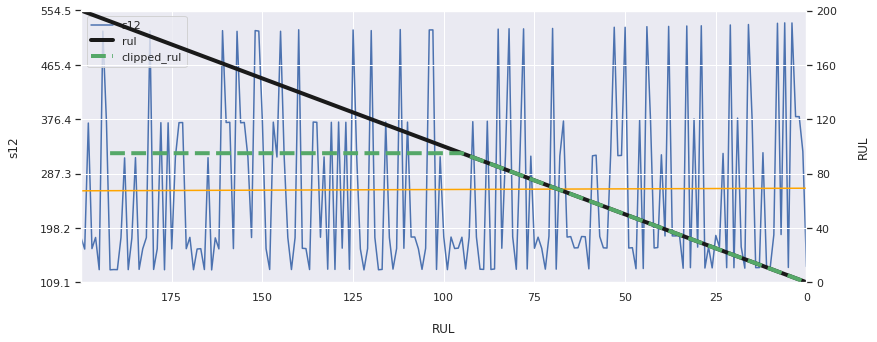

In [21]:
g = df[df.id==1][['cycle', 's12']]
z = np.polyfit(g.cycle, g['s12'], 1)
y_hat = np.poly1d(z)(g.cycle)

clipped_rul = df.loc[df['id']==1].copy()
clipped_rul['rul'].clip(upper=95, inplace=True)

fig, ax1 = plt.subplots(1,1, figsize=(13,5))

signal = ax1.plot('rul', 's12', 'b',
                 data=df.loc[df['id']==1])
plt.xlim(200, 0)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 200, 25))
ax1.set_ylabel('s12', labelpad=20)
ax1.set_xlabel('RUL', labelpad=20)
sns.lineplot(x=df.loc[df['id']==1]['rul'], y=y_hat, ax=ax1, color='orange')

ax2 = ax1.twinx()
rul_line = ax2.plot('rul', 'rul', 'k', linewidth=4,
                   data=df.loc[df['id']==1])
rul = df.loc[df['id']==5, 'rul']
rul_line2 = ax2.plot(rul, rul.where(rul <= 95, 95), '--g', linewidth=4,
                     label='clipped_rul')  # SET LABEL MANUALLY?
ax2.set_ylabel('RUL', labelpad=20)

# code to have equal spacing of y ticks for both axes, so the gridlines allign
ax2.set_ylim(0, 200)  # set limits of axis you want to display neatly
ax2.set_yticks(
    np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))  
# choose integer to neatly divide your axis, in our case 6
ax1.set_yticks(
    np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6)) 
# apply same spacing to other axis


# code to have a unified legend
lines = signal+rul_line+rul_line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=0)

plt.show()

## Machine Learning Models

In [23]:
# Reading the test set
test = pd.read_csv('test_FD004.txt', header=None, sep=' ').dropna(how='all',
                                                                  axis=1)
test.columns = col_names
test

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        1      1   20.0072    0.7000     100.0  491.19  606.67  1481.04   
1        1      2   24.9984    0.6200      60.0  462.54  536.22  1256.17   
2        1      3   42.0000    0.8420     100.0  445.00  549.23  1340.13   
3        1      4   42.0035    0.8402     100.0  445.00  549.19  1339.70   
4        1      5   35.0079    0.8400     100.0  449.44  555.10  1353.04   
...    ...    ...       ...       ...       ...     ...     ...      ...   
41209  248    277   41.9991    0.8401     100.0  445.00  550.30  1364.40   
41210  248    278   20.0026    0.7005     100.0  491.19  608.00  1494.75   
41211  248    279   34.9988    0.8413     100.0  449.44  555.92  1370.65   
41212  248    280   20.0027    0.7000     100.0  491.19  608.19  1489.11   
41213  248    281   35.0075    0.8402     100.0  449.44  556.40  1378.58   

            s4    s5  ...     s12      s13      s14      s15   s16  s17   s18  \
0      1227.81  9.35  ...  313.03  2387.78  8048.98   9.2229  0.02  362  2324   
1      1031.48  7.05  ...  163.61  2028.09  7863.46  10.8632  0.02  306  1915   
2      1105.88  3.91  ...  129.98  2387.95  8071.13   9.3960  0.02  328  2212   
3      1107.26  3.91  ...  129.48  2387.90  8078.89   9.3594  0.02  328  2212   
4      1117.80  5.48  ...  181.82  2387.87  8057.83   9.3030  0.02  333  2223   
...        ...   ...  ...     ...      ...      ...      ...   ...  ...   ...   
41209  1129.17  3.91  ...  130.87  2388.50  8112.61   9.4427  0.02  331  2212   
41210  1260.88  9.35  ...  314.51  2388.33  8086.83   9.2772  0.02  366  2324   
41211  1130.97  5.48  ...  182.76  2388.64  8100.84   9.3982  0.02  336  2223   
41212  1256.25  9.35  ...  314.17  2388.37  8085.24   9.2727  0.03  366  2324   
41213  1140.70  5.48  ...  181.88  2388.59  8098.17   9.3964  0.02  335  2223   

          s19    s20      s21  
0      100.00  24.31  14.7007  
1       84.93  14.36   8.5748  
2      100.00  10.39   6.4365  
3      100.00  10.56   6.2367  
4      100.00  14.85   8.9326  
...       ...    ...      ...  
41209  100.00  10.53   6.2620  
41210  100.00  24.33  14.6486  
41211  100.00  14.69   8.8389  
41212  100.00  24.44  14.6887  
41213  100.00  14.72   8.8502  

[41214 rows x 26 columns]

In [27]:
# y test true values
truth = pd.read_fwf('RUL_FD004.txt', sep=' ', header=None)

Various research used different methods to predict in this test set. I chose using only the last available cycle for each engine in the test set. The different methods include using the last 5 cycles, mean or median of these last few cycles, etc.

The variables used in the train varied also. Some chose to not include either or both of the id and cycle columns. I did however, since I felt they add some relativeness to time.

In [24]:
X_train = df[['id', 'cycle']+order2]
y_train = df.rul

X_test = test.groupby('id').last().reset_index()[['id', 'cycle']+order2]

The sensor data needs to be scaled since each sensor has a different range of values.

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
sensors_scaled = scaler.fit_transform(X_train.drop(columns=['id', 'cycle']))

In [26]:
X_train_scaled = pd.concat([X_train[['id', 'cycle']],
                            pd.DataFrame(sensors_scaled,
                                         columns=X_train.columns[2:])], 1)
X_test_scaled = pd.concat([X_test[['id', 'cycle']], 
                           pd.DataFrame(scaler.transform(
                                        X_test.drop(columns=['id', 'cycle'])),
                                        columns=X_test.columns[2:])], 1)

The GBM, RF, and LR models were chosen for a baseline analysis.

In [28]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

GBM = GradientBoostingRegressor() 
GBM.fit(X_train_scaled,y_train)

y_pred_GBM = GBM.predict(X_test_scaled)

RF = RandomForestRegressor() 
RF.fit(X_train_scaled,y_train)

y_pred_RF = RF.predict(X_test_scaled)

LR = LinearRegression() 
LR.fit(X_train_scaled,y_train)

y_pred_LR = LR.predict(X_test_scaled)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [31]:
print('GBM')
evaluate(df.rul, GBM.predict(X_train_scaled), 'train')
evaluate(truth[0].values, GBM.predict(X_test_scaled))

print('\nRF')
evaluate(df.rul, RF.predict(X_train_scaled), 'train')
evaluate(truth[0].values, RF.predict(X_test_scaled))

print('\nLR')
evaluate(df.rul, LR.predict(X_train_scaled), 'train')
evaluate(truth[0].values, LR.predict(X_test_scaled))

GBM
train set RMSE:46.09682214258975, R2:0.7363929195053274
test set RMSE:43.720636997219565, R2:0.3570150056764625

RF
train set RMSE:13.816894924211429, R2:0.9763170385786131
test set RMSE:39.31727705475037, R2:0.48001029947424656

LR
train set RMSE:55.76886181226985, R2:0.6141676306087361
test set RMSE:46.47156575385792, R2:0.27355542220394824


The models results in an RMSE of 39-46 cycles on the test set. Using this prediction to a machine running 200+ days may be considered a somewhat below average prediction. Furthermore, looking at the $R^2$ score, it appears that the model is overfitting. To improve this, the y train was clipped as previously suggested. This led to quite an improvement with such a simple step. Although the train $R^2$ score dropped severly, it would be expected because of the change in the y.

In [32]:
y_train_clipped = y_train.clip(upper=125) # 125

In [33]:
y_train_clipped = y_train.clip(upper=125)

GBM = GradientBoostingRegressor() 
GBM.fit(X_train_scaled,y_train_clipped)

y_pred_GBM = GBM.predict(X_test_scaled)

RF = RandomForestRegressor() 
RF.fit(X_train_scaled,y_train_clipped)

y_pred_RF = RF.predict(X_test_scaled)

LR = LinearRegression() 
LR.fit(X_train_scaled,y_train_clipped)

y_pred_LR = LR.predict(X_test_scaled)

In [34]:
print('GBM')
evaluate(df.rul, GBM.predict(X_train_scaled), 'train')
evaluate(truth[0].values, GBM.predict(X_test_scaled))

print('\nRF')
evaluate(df.rul, RF.predict(X_train_scaled), 'train')
evaluate(truth[0].values, RF.predict(X_test_scaled))

print('\nLR')
evaluate(df.rul, LR.predict(X_train_scaled), 'train')
evaluate(truth[0].values, LR.predict(X_test_scaled))

GBM
train set RMSE:78.37390875064848, R2:0.23799449001834738
test set RMSE:32.26959936419101, R2:0.6497202564694499

RF
train set RMSE:74.69104565908401, R2:0.3079265689056929
test set RMSE:29.580324521382835, R2:0.7056705326553914

LR
train set RMSE:78.26737308451253, R2:0.24006470931325574
test set RMSE:34.774237984575215, R2:0.5932354282070159


### LSTM

In [35]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (LSTM, Dense, Dropout, Masking,
                                     TimeDistributed, Flatten)
from keras.optimizers import RMSprop

# from tensorflow.keras.layers import (Bidirectional, LSTM, RepeatVector,
#                                      TimeDistributed, Dense)
# from tensorflow.keras.activations import elu, relu

In [43]:
def gen_train_data(df, sequence_length, columns):
    data = df[columns].values
    num_elements = data.shape[0]

    # -1 and +1 because of Python indexing
    for start, stop in zip(range(0, num_elements-(sequence_length-1)),
                           range(sequence_length, num_elements+1)):
        yield data[start:stop, :]
        
def gen_data_wrapper(df, sequence_length, columns, unit_nrs=np.array([])):
    if unit_nrs.size <= 0:
        unit_nrs = df['id'].unique()
        
    data_gen = (list(gen_train_data(df[df['id']==unit_nr], sequence_length,
                                    columns))
               for unit_nr in unit_nrs)
    data_array = np.concatenate(list(data_gen)).astype(np.float32)
    return data_array

def gen_labels(df, sequence_length, label):
    data_matrix = df[label].values
    num_elements = data_matrix.shape[0]

# -1 because I want to predict the rul of that last row in the sequence,
# not the next row
    return data_matrix[sequence_length-1:num_elements, :]  

def gen_label_wrapper(df, sequence_length, label, unit_nrs=np.array([])):
    if unit_nrs.size <= 0:
        unit_nrs = df['id'].unique()
        
    label_gen = [gen_labels(df[df['id']==unit_nr], sequence_length, label) 
                for unit_nr in unit_nrs]
    label_array = np.concatenate(label_gen).astype(np.float32)
    return label_array

def gen_test_data(df, sequence_length, columns, mask_value):
    if df.shape[0] < sequence_length:
        data_matrix = np.full(shape=(sequence_length, len(columns)),
                              fill_value=mask_value) # pad
        idx = data_matrix.shape[0] - df.shape[0]
        data_matrix[idx:,:] = df[columns].values  # fill with available data
    else:
        data_matrix = df[columns].values
        
    # specifically yield the last possible sequence
    stop = num_elements = data_matrix.shape[0]
    start = stop - sequence_length
    for i in list(range(1)):
        yield data_matrix[start:stop, :]  
        

# For other FD
# before we start plotting, lets implement the condition specific scaling
def add_operating_condition(df):
    df_op_cond = df.copy()
    
    df_op_cond['setting1'] = df_op_cond['setting1'].round()
    df_op_cond['setting2'] = df_op_cond['setting2'].round(decimals=2)
    
# converting settings to string and concatanating makes the operating condition
# into a categorical variable
    df_op_cond['op_cond'] = df_op_cond['setting1'].astype(str) + '_' + \
                        df_op_cond['setting2'].astype(str) + '_' + \
                        df_op_cond['setting3'].astype(str)
    
    return df_op_cond

def condition_scaler(df_train, df_test, sensor_names):
    # apply operating condition specific scaling
    scaler = StandardScaler()
    for condition in df_train['op_cond'].unique():
        scaler.fit(df_train.loc[df_train['op_cond']==condition, sensor_names])
        df_train.loc[df_train['op_cond']==condition, sensor_names] = (scaler
        .transform(df_train.loc[df_train['op_cond']==condition, sensor_names]))
        df_test.loc[df_test['op_cond']==condition, sensor_names] = (scaler
        .transform(df_test.loc[df_test['op_cond']==condition, sensor_names]))
    return df_train, df_test

In [44]:
train = df.copy()
train.columns = col_names + ['RUL']

In [45]:
X_train['rul'] = y_train_clipped

remaining_sensors = ['s'+i[1:] for i in order2]
drop_sensors = [element for element in sensor_names if element not in
                remaining_sensors]

In [46]:
X_train_interim = add_operating_condition(train.drop(drop_sensors, axis=1))
X_test_interim = add_operating_condition(test.drop(drop_sensors, axis=1))

X_train_interim, X_test_interim = condition_scaler(X_train_interim,
                                                   X_test_interim, remaining_sensors)

In [47]:
from sklearn.model_selection import GroupShuffleSplit

sequence_length = 20
mask_value = -99.
gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
for train_unit, val_unit in gss.split(X_train['id'].unique(),
                                      groups=X_train['id'].unique()):
    train_unit = X_train['id'].unique()[train_unit]
    val_unit = X_train['id'].unique()[val_unit]

    train_split_array = gen_data_wrapper(X_train, sequence_length,
                                         remaining_sensors, train_unit)
    train_split_label = gen_label_wrapper(X_train, sequence_length, ['rul'],
                                          train_unit)
    
    val_split_array = gen_data_wrapper(X_train, sequence_length,
                                       remaining_sensors, val_unit)
    val_split_label = gen_label_wrapper(X_train, sequence_length, ['rul'],
                                        val_unit)

# create sequences train, test 
train_array = gen_data_wrapper(X_train, sequence_length, remaining_sensors)
label_array = gen_label_wrapper(X_train, sequence_length, ['rul'])

test_gen = (list(gen_test_data(X_train[X_train['id']==unit_nr],
                               sequence_length, remaining_sensors, mask_value))
           for unit_nr in X_train['id'].unique())
test_array = np.concatenate(list(test_gen)).astype(np.float32)

In [48]:
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(sequence_length,
                                                train_array.shape[2])))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 20, 24)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                7296      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
_________________________________________________________________


In [49]:
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=[rmse])

In [50]:
history = model.fit(train_split_array, train_split_label,
                    validation_data=(val_split_array, val_split_label),
                    epochs=5,
                   batch_size=32)

Epoch 1/5
1423/1423 [==============================] - 91s 62ms/step - loss: 4989008.5104 - root_mean_squared_error: 2045.8533 - val_loss: 3468.0857 - val_root_mean_squared_error: 58.8905
Epoch 2/5
1423/1423 [==============================] - 88s 62ms/step - loss: 3294.2477 - root_mean_squared_error: 57.3932 - val_loss: 3180.6807 - val_root_mean_squared_error: 56.3975
Epoch 3/5
1423/1423 [==============================] - 88s 62ms/step - loss: 165260.3338 - root_mean_squared_error: 341.7313 - val_loss: 1690.3953 - val_root_mean_squared_error: 41.1144
Epoch 4/5
1423/1423 [==============================] - 89s 62ms/step - loss: 1775.0549 - root_mean_squared_error: 42.1301 - val_loss: 1703.8093 - val_root_mean_squared_error: 41.2772
Epoch 5/5
1423/1423 [==============================] - 88s 62ms/step - loss: 1914.6088 - root_mean_squared_error: 43.7489 - val_loss: 2129.2815 - val_root_mean_squared_error: 46.1441


In [51]:
# predict and evaluate
print('LSTM')
y_hat_train = model.predict(train_array)
evaluate(label_array, y_hat_train, 'train')

y_hat_test = model.predict(test_array)
evaluate(truth, pd.DataFrame(y_hat_test[:-1]))

LSTM
train set RMSE:46.38047409057617, R2:-0.2658394564276725
test set RMSE:58.185258683551666, R2:-0.1388166678108953


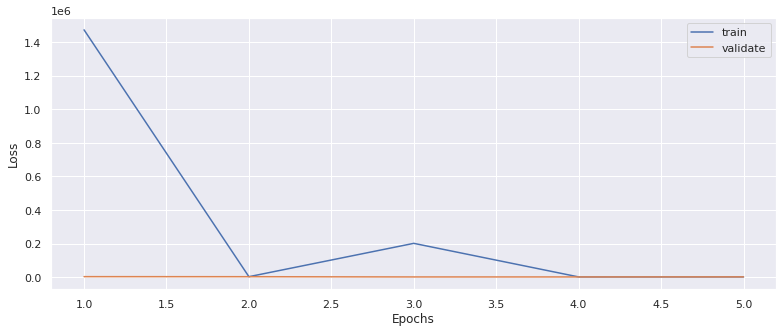

In [52]:
# plot history
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

Due to kernel issues on jojie, the optimized values were not achieved. However, the following are the values achieved by the guide paper after quite some hyperparameter tuning..

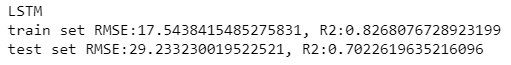


## Conclusion

Although this score is slightly better than our best model: Random Forest with a clipped y, LSTMs are more complicated and time consuming. This shows us that more complex models are not always the key to an optimal solution.

Another issue that arises is that the predictions always have some error. To use the predictions therefore, an interval needs to be made. The following figure illustrates the present method vs the modified one.

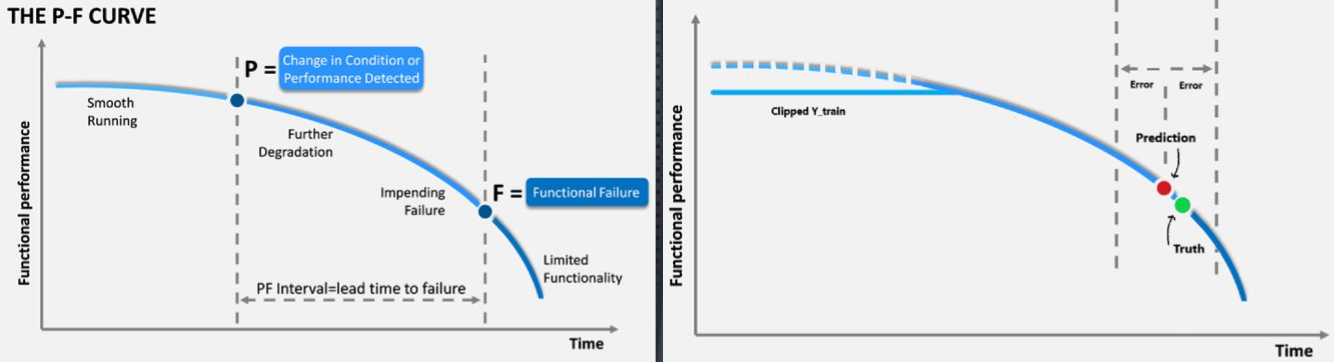

## Recommendations

It was previously noted that a single sensor may not be accurately indicative of an asset's health. In fact, it may be estimated using multiple sensors. To fit the readings of these multiple sensors the following method is suggested. The sensor data can be fit in to a PCA and then curve fitted. The codes in this section were sourced from a public github repo.

In [73]:
from sklearn.decomposition import PCA

sensors_scaled = scaler.fit_transform(df1.drop(columns=['id', 'cycle', 'rul'])
                                      [order4])

pca = PCA()
pca.fit(sensors_scaled)
100*pca.explained_variance_ratio_

array([74.87714026,  3.40879361,  3.29685633,  2.85733537,  2.77984779,
        2.56149157,  2.47501371,  1.97511338,  1.76706345,  1.59930534,
        1.56499601,  0.83704317])

In [74]:
pca = PCA(n_components=3, whiten=True)
sensors_pca = pca.fit_transform(sensors_scaled[:, :6])
100*pca.explained_variance_ratio_

array([81.91677609,  4.81393047,  4.16760062])

In [75]:
df2 = df1.drop(columns='rul').copy()

col_name = ['engine', 'time', 'op_cond_1', 'op_cond_2', 'op_cond_3']
col_name = col_name + ['sn_{}'.format(s + 1) for s in range(21)]

df2.columns = col_name
df2 = df2.set_index('engine')

for id in df2.index.unique():
    df2.loc[id,'RUL'] = df2.loc[id]['time'].apply(lambda x: x-df2.loc[id]['time'].max())

# create a dictionary with engine slices 

engines=df2.index.unique().values # engine numbers
engine_slices = dict()# key is engine number, value is a slice that gives numpy index for the data that pertains to an engine  

for i,engine_num in enumerate(engines):
    row_name=df2.loc[engine_num].iloc[-1].name
    row_sl=df2.index.get_loc(row_name) # row slice to get numpy index 
    engine_slices[engine_num]=row_sl
    
# create RUL vector
RUL = np.empty(len(engines))

for i,engine_num in enumerate(engines):
    RUL[i]=-1*df2.loc[engine_num]['RUL'].min()
    
# conditions and thersholds for high HI and low HI
RUL_high = 150 # threshold of number of cycles that makes us consider the engine started at perfect health 
RUL_low = 10  # threshold of the number of cycles below which engine is considered has failed l ( for purposes of modeling and getting data)  
RUL_df = df2['RUL'].values

# Gather data and prepare it for HI fusing and modeling
# find engines with high (low) HI at their initial (final) cycles
idx_high_HI = [RUL_df<=-RUL_high][0]
idx_low_HI  = [RUL_df>-RUL_low][0]

# data for to make fuse sensor model (HI creation)
high_HI_data= sensors_pca[idx_high_HI,:]
low_HI_data= sensors_pca[idx_low_HI,:]
# concatenate high HI and Low HI data
X_HI = np.concatenate((high_HI_data,low_HI_data),axis=0)

# target for the fused signal [ just 0 or 1 for failed ans healthy]
y_one = np.ones(high_HI_data.shape[0])
y_zero = np.zeros(low_HI_data.shape[0])
# concatenate high HI and Low HI target
y_HI = np.concatenate((y_one,y_zero),axis=0)

# fit a model to get fused sensor 
from sklearn.linear_model import LinearRegression, LogisticRegression

# linear regression
HI_linear = LinearRegression()
HI_linear.fit(X_HI,y_HI)

# logistic regression
HI_logistic = LogisticRegression(solver='liblinear')
HI_logistic.fit(X_HI,y_HI)

LogisticRegression(solver='liblinear')

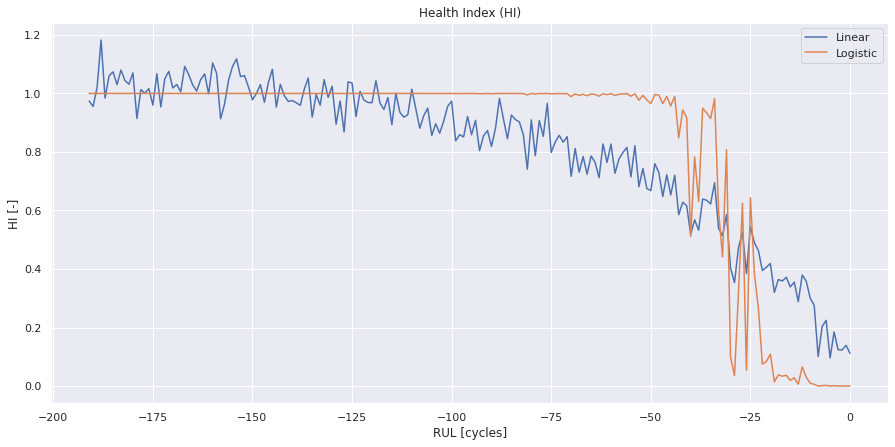

In [76]:
# let's see how this HI varies with RUL for a specific engine 

# get data for and engine
engine_num=1
engine_sensors=sensors_pca[engine_slices[engine_num],:]
RUL_engine = df2.loc[engine_num]['RUL']

# predict the HI
HI_pred_lin = HI_linear.predict(engine_sensors)
HI_pred_log = HI_logistic.predict_proba(engine_sensors)[:,1]

# plot fused HI signal for linear and logistic models \
fig=plt.figure(figsize=(15,7))
plt.plot(RUL_engine,HI_pred_lin,label='Linear')
plt.plot(RUL_engine,HI_pred_log,label='Logistic')
plt.title('Health Index (HI)')
plt.xlabel('RUL [cycles]')
plt.ylabel('HI [-]')
plt.legend();

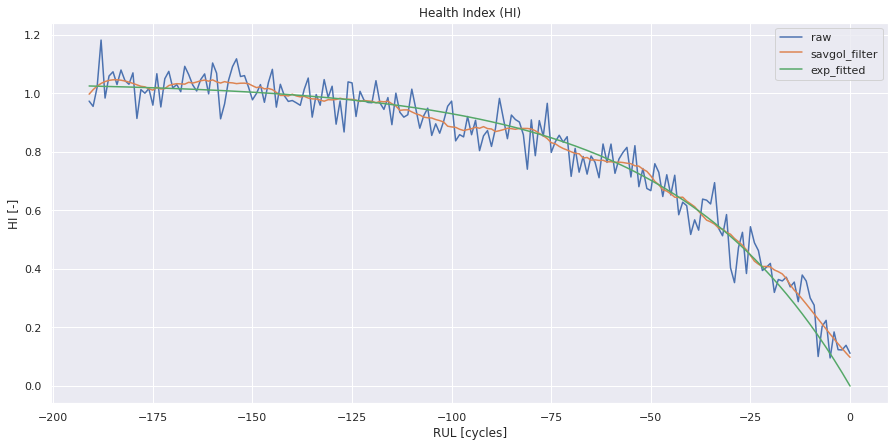

In [81]:
from scipy.optimize import curve_fit

def exp_func(x, a, b):
    return a * (np.exp(b * x)-1)

# row of all the health index for all engines
HI_linear_df = HI_linear.predict(sensors_pca) 

# prepare sample data for fitting function 
# engine_num=1
engine_idx=engine_slices[engine_num]
xdata=RUL_df[engine_idx]
y = HI_linear_df[engine_idx]

popt,_ = curve_fit(exp_func, xdata, y)

from statsmodels.tsa.holtwinters import ExponentialSmoothing , HoltWintersResults
from scipy.signal import savgol_filter

# find odd window length for filtering
percent_n_smaple = 0.15
temp_window = int(len(y)*percent_n_smaple)
if temp_window %2 ==0:
    window = temp_window-1
else:
    window= temp_window
    
# apply savgol_filter to the signal
y_filter = savgol_filter(y, window_length=window,polyorder=3)

# compute the exponential model curve 
y_exp_model = exp_func(xdata, *popt)

fig=plt.figure(figsize=(15,7))
plt.plot(xdata,y,label='raw')
plt.plot(xdata,y_filter,label='savgol_filter')
plt.plot(xdata,y_exp_model ,label='exp_fitted')
plt.title('Health Index (HI)')
plt.xlabel('RUL [cycles]')
plt.ylabel('HI [-]')
plt.legend();

This method of inputting the fitted curves as the X train allowed the test accuracy to reach as low as 2 cycles. Although the reference did not apply it to the test set, I would expect any model used would be overfitted. Further study is needed to make use of this curve effectively.

#### References:

Alhamaly, A. (2019, August 28). Jet Engine Remaining Useful Life (RUL) Prediction. Retrieved January 05, 2021, from https://medium.com/@hamalyas_/jet-engine-remaining-useful-life-rul-prediction-a8989d52f194​

Peters, K. (2020, September 7). Predictive maintenance of turbofan engines. Retrieved January 05, 2021, from https://towardsdatascience.com/predictive-maintenance-of-turbofan-engines-ec54a083127?source=friends_link​

Emmanuel Ramasso, Abhinav Saxena. Performance Benchmarking and Analysis of Prognostic Methods for CMAPSS Datasets.. International Journal of Prognostics and Health Management, 2014, 5 (2), pp.1-15. ffhal-01324587f